In [1]:
#pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pymysql
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


try:# Establish connection
    conn = pymysql.connect(
    host = 'localhost',
    user = 'root',
    password = '1234',
    database = 'tumor',
    port = 3306
    )

    #load data into Dataframe
    query = "SELECT * FROM brain_tumor_dataset"
    df = pd.read_sql(query, conn)

    # display results
    print("Connection successful ! Here's your data:")
    display(df.head())

except pymysql.Error as e:
    print(f'MySQL Error: {e}')

finally:
    if 'conn' in locals():
        conn.close()
        print("Connection closed")

Connection successful ! Here's your data:


C:\Users\Shree\AppData\Local\Temp\ipykernel_18200\956959958.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


Connection closed


In [2]:
#encoding are used to object ko numeric main convert karta hai
#dump=model fit



In [3]:
df

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292,1293,60,Female,Benign,2.763244,Temporal,Meningioma,II,Nausea,Nausea,Vision Issues,No,No,Yes,92.039827,0.291927,Yes,Negative,No
1293,1294,22,Male,Benign,0.779501,Temporal,Glioblastoma,II,Nausea,Headache,Seizures,Yes,No,No,89.385619,2.548710,Yes,Negative,No
1294,1295,50,Male,Malignant,9.243140,Parietal,Astrocytoma,IV,Headache,Headache,Nausea,Yes,No,No,92.904506,0.905885,Yes,Negative,No
1295,1296,47,Female,Malignant,6.897533,Frontal,Astrocytoma,IV,Seizures,Vision Issues,Nausea,No,No,No,91.815330,0.522367,No,Negative,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           1297 non-null   int64  
 1   Age                  1297 non-null   int64  
 2   Gender               1297 non-null   object 
 3   Tumor_Type           1297 non-null   object 
 4   Tumor_Size           1297 non-null   float64
 5   Location             1297 non-null   object 
 6   Histology            1297 non-null   object 
 7   Stage                1297 non-null   object 
 8   Symptom_1            1297 non-null   object 
 9   Symptom_2            1297 non-null   object 
 10  Symptom_3            1297 non-null   object 
 11  Radiation_Treatment  1297 non-null   object 
 12  Surgery_Performed    1297 non-null   object 
 13  Chemotherapy         1297 non-null   object 
 14  Survival_Rate        1297 non-null   float64
 15  Tumor_Growth_Rate    1297 non-null   f

In [5]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Tumor_Type', 'Tumor_Size', 'Location',
       'Histology', 'Stage', 'Symptom_1', 'Symptom_2', 'Symptom_3',
       'Radiation_Treatment', 'Surgery_Performed', 'Chemotherapy',
       'Survival_Rate', 'Tumor_Growth_Rate', 'Family_History', 'MRI_Result',
       'Follow_Up_Required'],
      dtype='object')

In [6]:
df.describe()

,Patient_ID,Age,Tumor_Size,Survival_Rate,Tumor_Growth_Rate
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,649.000000,49.219738,5.268744,71.412578,1.547134
std,374.555959,17.152556,2.734231,17.500671,0.825968
min,1.000000,20.000000,0.507914,40.014639,0.103801
25%,325.000000,34.000000,2.863505,56.882605,0.865784
50%,649.000000,48.000000,5.289103,71.904800,1.549621
75%,973.000000,64.000000,7.713895,87.175718,2.219649
max,1297.000000,79.000000,9.992463,99.986781,2.999594


In [7]:
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [8]:
df.tail()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
1292,1293,60,Female,Benign,2.763244,Temporal,Meningioma,II,Nausea,Nausea,Vision Issues,No,No,Yes,92.039827,0.291927,Yes,Negative,No
1293,1294,22,Male,Benign,0.779501,Temporal,Glioblastoma,II,Nausea,Headache,Seizures,Yes,No,No,89.385619,2.548710,Yes,Negative,No
1294,1295,50,Male,Malignant,9.243140,Parietal,Astrocytoma,IV,Headache,Headache,Nausea,Yes,No,No,92.904506,0.905885,Yes,Negative,No
1295,1296,47,Female,Malignant,6.897533,Frontal,Astrocytoma,IV,Seizures,Vision Issues,Nausea,No,No,No,91.815330,0.522367,No,Negative,Yes
1296,1297,69,Female,Malignant,4.223424,Frontal,Glioblastoma,II,Nausea,Nausea,Seizures,Yes,No,Yes,92.947213,0.559068,Yes,Positive,Yes


In [9]:
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
#import pickle
import joblib

In [11]:
# drop irrelevant columns
df = df.drop(columns = ['Patient_ID'])

C:\Users\Shree\AppData\Local\Temp\ipykernel_18200\3958615891.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Tumor_Type', palette = 'coolwarm')


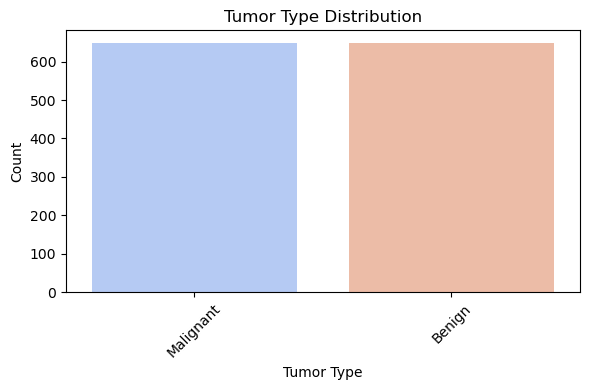

In [12]:
# plot tumor type distribution
plt.figure(figsize = (6,4))
sns.countplot(data = df, x = 'Tumor_Type', palette = 'coolwarm')
plt.title("Tumor Type Distribution")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


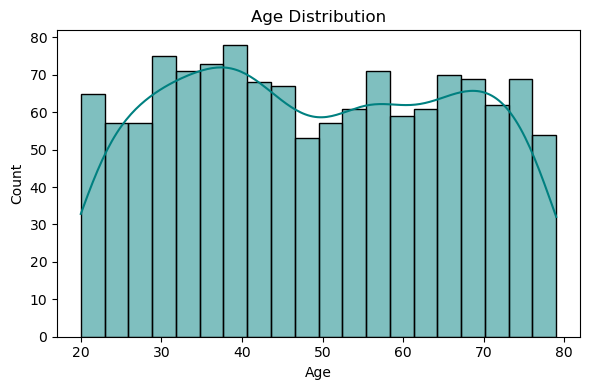

In [13]:
# plot distribution of age
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins = 20, kde = True, color = "teal")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.show()


In [14]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [15]:
# Define features and target
X = df.drop("Tumor_Type", axis = 1)
y = df['Tumor_Type']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [16]:
# Train Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print(f'Accuracy: {accuracy_score(y_test, y_pred): .2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model
# with open("random_forest_classifier.pkl", "wb") as f:
#     #pickle.dump(clf, f)
joblib.dump(clf, "random_forest_classifier.joblib")

print("✅ Model saved as 'random_forest_classifier.joblib'")


# print("✅ Model saved as 'random_forest_classifier.pkl'")

Accuracy:  0.53

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.54      0.53       126
           1       0.54      0.51      0.53       134

    accuracy                           0.53       260
   macro avg       0.53      0.53      0.53       260
weighted avg       0.53      0.53      0.53       260

Confusion Matrix:
 [[68 58]
 [65 69]]
✅ Model saved as 'random_forest_classifier.joblib'


In [19]:
df= DecisionTreeClassifier(random_state=42)
df.fit(X_train, y_train)
y_pred_df = df.predict(X_test)

print("🔹 Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_df))
print(confusion_matrix(y_test, y_pred_df))
print(classification_report(y_test, y_pred_df))


🔹 Decision Tree
Accuracy: 0.5076923076923077
[[55 71]
 [57 77]]
              precision    recall  f1-score   support

           0       0.49      0.44      0.46       126
           1       0.52      0.57      0.55       134

    accuracy                           0.51       260
   macro avg       0.51      0.51      0.50       260
weighted avg       0.51      0.51      0.51       260

